In [ ]:
import requests
import math
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# request url
page = requests.get("https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=adventure&sort=user_rating,desc&start=1")

# create a BeautifulSoup object
soup = BeautifulSoup(page.content, 'html.parser')


In [ ]:
def scrape_nums(page_soup):
    nums = page_soup.find_all("span",{'class':'lister-item-index'})
    nums = [int(i.text.replace('.','')) for i in nums]
    return nums
#scrape_nums(soup)

In [ ]:
def scrape_titles(page_soup):
    titles_container = page_soup.find_all(class_= "lister-item-header")
    titles = [title.get_text() for title in titles_container ] #loop to getText in days_container
    titles = [title.split('\n') for title in titles] #split by \n
    titles_names = [title[2] for title in titles] #split by \n
    return titles_names

#scrape_titles(soup)

In [ ]:
def scrape_years(page_soup):
    titles_container = page_soup.find_all(class_= "lister-item-header")
    title_splits = [title.get_text().split('\n') for title in titles_container ] #loop to getText in days_container
    years = [title[3] for title in title_splits]
    return years

#scrape_years(soup)

In [ ]:
## - Release Date Scraper

def scrape_years(page_soup):
    titles_container = page_soup.find_all(class_= "lister-item-header")
    title_splits = [title.get_text().split('\n') for title in titles_container ] #loop to getText in days_container
    years = [title[3] for title in title_splits]
    return years

#scrape_years(soup)

In [ ]:
# - Director Scraper

def scrape_dirs(page_soup):
    movies_director=page_soup.find_all(class_= "lister-item-content")
    director_list=[]
    for director in movies_director:
        director_list.append(director.find("p",{"class":""}).a.text)
    return director_list

#scrape_dirs(soup)

In [ ]:
# - Rating Scraper

def scrape_ratings(page_soup):
    movies_rating=page_soup.find_all(class_="inline-block ratings-imdb-rating")
    rating_list=[]
    for rating in movies_rating:
        rating_list.append(int(rating.strong.text[2])*0.1+8)
    return rating_list

#scrape_ratings(soup)

In [ ]:
# - Duration Scraper

def scrape_durs(page_soup):
    duration = soup.find_all(class_='lister-item-content')
    dur = [title.get_text() for title in duration]
    dur = [title.split('\n') for title in dur]
    #display(dur)
    duration = [title[9] for title in dur]
    # display(duration)
    
    duration_list=[]
    for i in (duration):
        i.split()
        duration_list.append(int(i[:-3]))



    return duration_list
#scrape_durs(soup)

In [ ]:
# - Genres Scraper

def scrape_genres(page_soup):
    genres = soup.find_all("span",{'class':'genre'})
    genres = [i.text.strip().split(',') for i in genres]
    return genres
#scrape_genres(soup)

In [ ]:
# - Stars Scraper
def scrape_stars(soup_page):
    movies_stars=soup_page.find_all(class_= "lister-item-content")
    stars_list=[]
    for stars in movies_stars:
        stars_list.append(str(stars.find("p",{"class":""}).text.split("\n")[5:-1]).strip())
    return stars_list

#scrape_stars(soup)

In [ ]:
movies_descs=soup.find_all(class_= "lister-item-content")

x=movies_descs[0].find_all("p",{"class":"text-muted"})
x[1].text.split("\n")[1].strip()



"Gandalf and Aragorn lead the World of Men against Sauron's army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring."

In [ ]:
# get descriptions
def scrape_descs(soup_page):
    movies_descs=soup_page.find_all(class_= "lister-item-content")
    descs_list=[]
    #movies_descs.findall("p",{"class":"text-muted"})
    for descs in movies_descs:
        descs_list.append((descs.find_all("p",{"class":"text-muted"}))[1].text.split("\n")[1].strip())
    return descs_list

#scrape_descs(soup)

In [ ]:
def IMDB_scraper2(num_mov):
    num_pages = num_mov/2
    print("Will scare {} movies over {} pages.".format(num_mov,num_pages))

    nums, titles, descs, years, dirs, ratings, durs, genres, stars, film_dates = [],[],[],[],[],[],[],[],[],[]

    for i in range (0,int(num_pages)):
        ind = i*50+1
        page = requests.get("https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=adventure&sort=user_rating,desc&start={}".format(ind))

        page_soup = BeautifulSoup(page.content, 'html.parser')


    scrape_df = pd.DataFrame({'Number': scrape_nums(page_soup),
                    'Title': scrape_titles(page_soup), 
                    'Description': scrape_descs(page_soup),
                    'Release date':scrape_years(page_soup),
                    'Director':scrape_dirs(page_soup),
                    'Rating':scrape_ratings(page_soup),
                    'Duration':scrape_durs(page_soup),
                    'Genre':scrape_genres(page_soup),
                    'Stars':scrape_stars(page_soup),
                    #'Filming Date':film_dates
                    })

    return scrape_df


IMDB_scraper2(20)

Will scare 20 movies over 10.0 pages.


,Number,Title,Description,Release date,Director,Rating,Duration,Genre,Stars
0,451,The Amazing Spider-Man,After Peter Parker is bitten by a genetically ...,(2012),Marc Webb,8.9,201,"[Action, Adventure, Drama]","['Andrew Garfield, ', 'Emma Stone, ', 'Rhys If..."
1,452,Cloudy with a Chance of Meatballs,A local scientist is often regarded as a failu...,(2009),Phil Lord,8.9,148,"[Action, Adventure, Sci-Fi]","[' Stars:', 'Anna Faris, ', 'Bill Hader, ',..."
2,453,Extremely Loud & Incredibly Close,"A nine-year-old amateur inventor, Francophile,...",(2011),Stephen Daldry,8.9,178,"[Action, Adventure, Drama]","['Thomas Horn, ', 'Tom Hanks, ', 'Sandra Bullo..."
3,454,Captain America: The First Avenger,"Steve Rogers, a rejected military soldier, tra...",(2011),Joe Johnston,8.9,179,"[Action, Adventure, Drama]","['Chris Evans, ', 'Hugo Weaving, ', 'Samuel L...."
4,455,The Guardian,A high school swim champion with a troubled pa...,(I) (2006),Andrew Davis,8.9,124,"[Action, Adventure, Fantasy]","['Kevin Costner, ', 'Ashton Kutcher, ', 'Sela ..."
5,456,National Treasure,A historian races to find the legendary Templa...,(2004),Jon Turteltaub,8.9,169,"[Adventure, Drama, Sci-Fi]","['Nicolas Cage, ', 'Diane Kruger, ', 'Justin B..."
6,457,"The Chronicles of Narnia: The Lion, the Witch ...",Four kids travel through a wardrobe to the lan...,(2005),Andrew Adamson,8.9,125,"[Animation, Adventure, Family]","['Tilda Swinton, ', 'Georgie Henley, ', 'Willi..."
7,458,Madagascar,A group of animals who have spent all their li...,(2005),Eric Darnell,8.9,121,"[Action, Adventure, Fantasy]","[' Stars:', 'Chris Rock, ', 'Ben Stiller, '..."
8,459,Mission: Impossible III,IMF agent Ethan Hunt comes into conflict with ...,(2006),J.J. Abrams,8.9,207,"[Action, Adventure, Drama]","['Tom Cruise, ', 'Michelle Monaghan, ', 'Ving ..."
9,460,Atlantis: The Lost Empire,A young linguist named Milo Thatch joins an in...,(2001),Gary Trousdale,8.9,155,"[Action, Adventure, Drama]","[' Stars:', 'Michael J. Fox, ', 'Jim Varney..."


In [ ]:
df=IMDB_scraper2(20)

Will scare 20 movies over 10.0 pages.


In [ ]:
#normalizing duration max/min
df["Duration"] = (df["Duration"] - df["Duration"].min()) / (df["Duration"].max() - df["Duration"].min())
#df["Duration"]

In [ ]:
#normalizing rating max/min
df["Rating"] = (df["Rating"]  - df["Rating"] .min()) / (df["Rating"] .max() - df["Rating"] .min())


In [ ]:
#normalizing rating (mean)
df["Rating"] = (df["Rating"] - df["Rating"].mean()) / (df["Rating"].max() - df["Rating"].min())
df

,Number,Title,Description,Release date,Director,Rating,Duration,Genre,Stars
0,451,The Amazing Spider-Man,After Peter Parker is bitten by a genetically ...,(2012),Marc Webb,0.38,0.745342,"[Action, Adventure, Drama]","['Andrew Garfield, ', 'Emma Stone, ', 'Rhys If..."
1,452,Cloudy with a Chance of Meatballs,A local scientist is often regarded as a failu...,(2009),Phil Lord,0.38,0.416149,"[Action, Adventure, Sci-Fi]","[' Stars:', 'Anna Faris, ', 'Bill Hader, ',..."
2,453,Extremely Loud & Incredibly Close,"A nine-year-old amateur inventor, Francophile,...",(2011),Stephen Daldry,0.38,0.602484,"[Action, Adventure, Drama]","['Thomas Horn, ', 'Tom Hanks, ', 'Sandra Bullo..."
3,454,Captain America: The First Avenger,"Steve Rogers, a rejected military soldier, tra...",(2011),Joe Johnston,0.38,0.608696,"[Action, Adventure, Drama]","['Chris Evans, ', 'Hugo Weaving, ', 'Samuel L...."
4,455,The Guardian,A high school swim champion with a troubled pa...,(I) (2006),Andrew Davis,0.38,0.267081,"[Action, Adventure, Fantasy]","['Kevin Costner, ', 'Ashton Kutcher, ', 'Sela ..."
5,456,National Treasure,A historian races to find the legendary Templa...,(2004),Jon Turteltaub,0.38,0.546584,"[Adventure, Drama, Sci-Fi]","['Nicolas Cage, ', 'Diane Kruger, ', 'Justin B..."
6,457,"The Chronicles of Narnia: The Lion, the Witch ...",Four kids travel through a wardrobe to the lan...,(2005),Andrew Adamson,0.38,0.273292,"[Animation, Adventure, Family]","['Tilda Swinton, ', 'Georgie Henley, ', 'Willi..."
7,458,Madagascar,A group of animals who have spent all their li...,(2005),Eric Darnell,0.38,0.248447,"[Action, Adventure, Fantasy]","[' Stars:', 'Chris Rock, ', 'Ben Stiller, '..."
8,459,Mission: Impossible III,IMF agent Ethan Hunt comes into conflict with ...,(2006),J.J. Abrams,0.38,0.782609,"[Action, Adventure, Drama]","['Tom Cruise, ', 'Michelle Monaghan, ', 'Ving ..."
9,460,Atlantis: The Lost Empire,A young linguist named Milo Thatch joins an in...,(2001),Gary Trousdale,0.38,0.459627,"[Action, Adventure, Drama]","[' Stars:', 'Michael J. Fox, ', 'Jim Varney..."


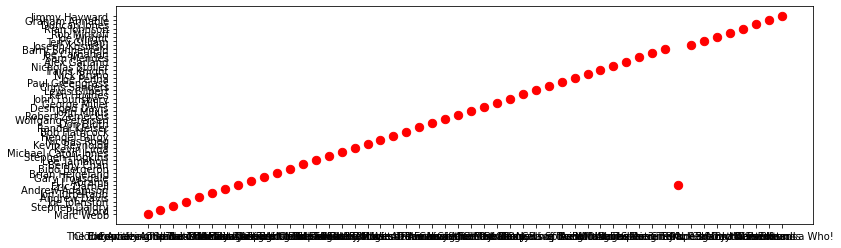

In [ ]:
fig = plt.subplots(figsize=(12.5,4))
#plt.xlim(-0.2,1.2)
#plt.ylim(-0.2,1.2)
plt.scatter(df['Title'],df['Director'],s=70,color="r")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=796ba814-f632-4502-b0d7-7e2f8f9e546d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>